[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mongodb-developer/GenAI-Showcase/blob/main/notebooks/agents/MongoDB_Haystack_self_reflecting_Cooking_agent.ipynb)


# Haystack and MongoDB Atlas Agentic RAG pipelines

Haystack and MongoDB enhanced example building on top of the basic RAG pipeline demonstrated on the following [notebook](https://github.com/mongodb-developer/GenAI-Showcase/blob/main/notebooks/rag/haystack_mongodb_cooking_advisor_pipeline.ipynb). Here the pipelines uses advanced technics of self reflection to advise on reciepes considering prices associated from the MongoDB Atlas vector store.

Install dependencies:

In [1]:
pip install haystack-ai mongodb-atlas-haystack tiktoken datasets

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 345.2/345.2 kB 3.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.8/547.8 kB 13.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 328.3/328.3 kB 7.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 11.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚


## Setup MongoDB Atlas connection and Open AI


* Set the MongoDB connection string. Follow the steps [here](https://www.mongodb.com/docs/manual/reference/connection-string/) to get the connection string from the Atlas UI. If you wish to use google collab we recommend to allow access on Atlas Network tab to `0.0.0.0/0` so the notebook node can access the database.

* Set the OpenAI API key. Steps to obtain an API key as [here](https://help.openai.com/en/articles/4936850-where-do-i-find-my-openai-api-key)

In [2]:
import getpass
import os

In [3]:
os.environ["MONGO_CONNECTION_STRING"] = getpass.getpass(
    "Enter your MongoDB connection string:"
)

Enter your MongoDB connection string:¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


In [4]:
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your Open AI Key:")

Enter your Open AI Key:¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


## Create vector search index on collection

Follow this [tutorial](https://www.mongodb.com/docs/atlas/atlas-vector-search/create-index/) to create a vector index on database: `haystack_test` collection `test_collection`.

Verify that the index name is `vector_index` and the syntax specify:
```
{
  "fields": [
    {
      "type": "vector",
      "path": "embedding",
      "numDimensions": 1536,
      "similarity": "cosine"
    }
  ]
}
```

### Setup vector store to load documents:

In [5]:
from bson import json_util
from haystack import Document, Pipeline
from haystack.components.builders.prompt_builder import PromptBuilder
from haystack.components.embedders import OpenAIDocumentEmbedder, OpenAITextEmbedder
from haystack.components.generators import OpenAIGenerator
from haystack.components.writers import DocumentWriter
from haystack.document_stores.types import DuplicatePolicy
from haystack_integrations.components.retrievers.mongodb_atlas import (
    MongoDBAtlasEmbeddingRetriever,
)
from haystack_integrations.document_stores.mongodb_atlas import (
    MongoDBAtlasDocumentStore,
)

dataset = {
    "train": [
        {
            "title": "Spinach Lasagna Sheets",
            "price": "$3.50",
            "description": "Infused with spinach, these sheets add a pop of color and extra nutrients.",
            "category": "Pasta",
            "emoji": "üìó",
        },
        {
            "title": "Gluten-Free Lasagna Sheets",
            "price": "$4.00",
            "description": "Perfect for those with gluten intolerance, made with a blend of rice and corn flour.",
            "category": "Pasta",
            "emoji": "üçöüåΩ",
        },
        {
            "title": "Mascarpone",
            "price": "$4.00",
            "description": "Creamy and rich, this cheese adds a luxurious touch to lasagna.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Queso Fresco",
            "price": "$3.00",
            "description": "A mild, crumbly cheese that can be a suitable replacement for ricotta.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Vegetarian Lentil Sauce",
            "price": "$4.00",
            "description": "A meatless option made with cooked lentils that mimics the texture of ground meat.",
            "category": "Vegetarian",
            "emoji": "üç≤",
        },
        {
            "title": "Turkey Bolognese",
            "price": "$5.00",
            "description": "A leaner alternative to beef, turkey provides a lighter but flavorful taste.",
            "category": "Poultry",
            "emoji": "ü¶É",
        },
        {
            "title": "Mushroom and Walnut Sauce",
            "price": "$5.50",
            "description": "Combining chopped mushrooms and walnuts for a hearty vegetarian filling.",
            "category": "Vegetarian",
            "emoji": "üçÑü•ú",
        },
        {
            "title": "Chicken Bolognese",
            "price": "$5.00",
            "description": "Ground chicken offers a different twist on the classic meat sauce.",
            "category": "Poultry",
            "emoji": "üêî",
        },
        {
            "title": "Vegan Soy Meat Sauce",
            "price": "$4.50",
            "description": "Made from soy protein, this vegan meat sauce replicates the texture and flavor of traditional meat.",
            "category": "Vegan",
            "emoji": "üå±",
        },
        {
            "title": "Tomato Basil Sauce",
            "price": "$3.50",
            "description": "A tangy alternative to b√©chamel, made with fresh tomatoes and basil.",
            "category": "Vegetarian",
            "emoji": "üçÖ",
        },
        {
            "title": "Pesto Cream Sauce",
            "price": "$5.50",
            "description": "A fusion of creamy b√©chamel and rich basil pesto for a unique flavor.",
            "category": "Dairy",
            "emoji": "üçù",
        },
        {
            "title": "Alfredo Sauce",
            "price": "$4.50",
            "description": "A rich and creamy white sauce made with parmesan and butter.",
            "category": "Dairy",
            "emoji": "üßà",
        },
        {
            "title": "Coconut Milk B√©chamel",
            "price": "$4.00",
            "description": "A dairy-free version of the classic b√©chamel made with coconut milk.",
            "category": "Vegan",
            "emoji": "ü••",
        },
        {
            "title": "Vegan Cashew Cream Sauce",
            "price": "$5.00",
            "description": "A rich and creamy sauce made from blended cashews as a dairy-free alternative.",
            "category": "Vegan",
            "emoji": "ü•ú",
        },
        {
            "title": "Kale",
            "price": "$2.00",
            "description": "Another leafy green option, kale offers a chewy texture and rich nutrients.",
            "category": "Leafy Greens",
            "emoji": "ü•¨",
        },
        {
            "title": "Bell Peppers",
            "price": "$2.50",
            "description": "Sliced bell peppers in various colors add sweetness and crunch.",
            "category": "Vegetables",
            "emoji": "ü´ë",
        },
        {
            "title": "Artichoke Hearts",
            "price": "$3.50",
            "description": "Tender and flavorful, artichoke hearts bring a Mediterranean twist to the dish.",
            "category": "Vegetables",
            "emoji": "üçΩÔ∏è",
        },
        {
            "title": "Spinach",
            "price": "$2.00",
            "description": "Fresh or frozen spinach adds a pop of color and nutrients.",
            "category": "Leafy Greens",
            "emoji": "ü•¨",
        },
        {
            "title": "Broccoli",
            "price": "$2.50",
            "description": "Small broccoli florets provide texture and a distinct flavor.",
            "category": "Vegetables",
            "emoji": "ü•¶",
        },
        {
            "title": "Whole Wheat Lasagna Sheets",
            "price": "$3.00",
            "description": "Made from whole wheat grains, these sheets are healthier and provide a nutty flavor.",
            "category": "Pasta",
            "emoji": "üåæ",
        },
        {
            "title": "Zucchini Slices",
            "price": "$2.50",
            "description": "Thinly sliced zucchini can replace traditional pasta for a low-carb version.",
            "category": "Vegetables",
            "emoji": "ü•í",
        },
        {
            "title": "Eggplant Slices",
            "price": "$2.75",
            "description": "Thin slices of eggplant provide a meaty texture, ideal for vegetarian lasagna.",
            "category": "Vegetables",
            "emoji": "üçÜ",
        },
        {
            "title": "Ground Turkey",
            "price": "$4.50",
            "description": "A leaner alternative to beef, turkey provides a lighter but flavorful taste.",
            "category": "Meat",
            "emoji": "ü¶É",
        },
        {
            "title": "Vegetarian Lentil Mince",
            "price": "$3.50",
            "description": "A meatless option made with cooked lentils that mimics the texture of ground meat.",
            "category": "Vegetarian",
            "emoji": "üç≤",
        },
        {
            "title": "Mushroom and Walnut Mince",
            "price": "$5.00",
            "description": "Combining chopped mushrooms and walnuts for a hearty vegetarian filling.",
            "category": "Vegetarian",
            "emoji": "üçÑü•ú",
        },
        {
            "title": "Ground Chicken",
            "price": "$4.00",
            "description": "Ground chicken offers a different twist on the classic meat sauce.",
            "category": "Poultry",
            "emoji": "üêî",
        },
        {
            "title": "Vegan Soy Meat Crumbles",
            "price": "$4.50",
            "description": "Made from soy protein, these crumbles replicate the texture and flavor of traditional meat.",
            "category": "Vegan",
            "emoji": "ü•©",
        },
        {
            "title": "Pesto Sauce",
            "price": "$4.00",
            "description": "A green, aromatic sauce made from basil, pine nuts, and garlic.",
            "category": "Canned Goods",
            "emoji": "üåø",
        },
        {
            "title": "Marinara Sauce",
            "price": "$3.50",
            "description": "A classic Italian tomato sauce with garlic, onions, and herbs.",
            "category": "Canned Goods",
            "emoji": "üçÖ",
        },
        {
            "title": "Bolognese Sauce",
            "price": "$5.00",
            "description": "A meat-based sauce simmered with tomatoes, onions, celery, and carrots.",
            "category": "Canned Goods",
            "emoji": "üçñüçÖüßÖü•ï",
        },
        {
            "title": "Arrabbiata Sauce",
            "price": "$4.00",
            "description": "A spicy tomato sauce made with red chili peppers.",
            "category": "Canned Goods",
            "emoji": "üå∂Ô∏èüçÖ",
        },
        {
            "title": "Provolone Cheese",
            "price": "$3.50",
            "description": "Semi-hard cheese with a smooth texture, it melts beautifully in dishes.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Cheddar Cheese",
            "price": "$3.00",
            "description": "A popular cheese with a sharp and tangy flavor profile.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Gouda Cheese",
            "price": "$4.50",
            "description": "A Dutch cheese known for its rich and creamy texture.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Fontina Cheese",
            "price": "$4.00",
            "description": "A semi-soft cheese with a strong flavor, great for melting.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Vegan Mozzarella",
            "price": "$5.00",
            "description": "Dairy-free alternative made from nuts or soy, melts similarly to regular mozzarella.",
            "category": "Vegan",
            "emoji": "üßÄ",
        },
        {
            "title": "Cottage Cheese",
            "price": "$2.50",
            "description": "A lighter alternative to ricotta, with small curds that provide a similar texture.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Goat Cheese",
            "price": "$4.00",
            "description": "A tangy and creamy cheese that can provide a unique flavor to lasagna.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Mascarpone Cheese",
            "price": "$4.50",
            "description": "An Italian cream cheese with a rich and creamy texture.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Tofu Ricotta",
            "price": "$3.00",
            "description": "A vegan alternative made from crumbled tofu seasoned with herbs.",
            "category": "Vegan",
            "emoji": "üå±",
        },
        {
            "title": "Feta Cheese",
            "price": "$3.50",
            "description": "A crumbly cheese with a salty profile, it can bring a Mediterranean twist to the dish.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Parmesan cheese",
            "price": "$4.00",
            "description": "A hard, granular cheese originating from Italy, known for its rich umami flavor.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Pecorino Romano",
            "price": "$5.00",
            "description": "A salty, hard cheese made from sheep's milk, perfect for grating over dishes.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Asiago Cheese",
            "price": "$4.50",
            "description": "Semi-hard cheese with a nutty flavor, great for shaving or grating.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Grana Padano",
            "price": "$5.50",
            "description": "A grainy, hard cheese that's similar to Parmesan but milder in flavor.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Manchego Cheese",
            "price": "$6.00",
            "description": "A Spanish hard cheese with a rich and nutty flavor.",
            "category": "Dairy",
            "emoji": "üßÄ",
        },
        {
            "title": "Eggs",
            "price": "$2.00",
            "description": "Rich in protein and versatile, eggs are used in a variety of culinary applications.",
            "category": "Dairy",
            "emoji": "ü•ö",
        },
        {
            "title": "Tofu",
            "price": "$2.00",
            "description": "Blended silken tofu can act as a binder in various dishes.",
            "category": "Vegan",
            "emoji": "üç≤",
        },
        {
            "title": "Flaxseed Meal",
            "price": "$1.50",
            "description": "Mix with water to create a gel-like consistency that can replace eggs.",
            "category": "Vegan",
            "emoji": "ü•ö",
        },
        {
            "title": "Chia Seeds",
            "price": "$2.50",
            "description": "Mix with water to form a gel that can be used as an egg substitute.",
            "category": "Vegan",
            "emoji": "ü•ö",
        },
        {
            "title": "Apple Sauce",
            "price": "$2.00",
            "description": "A sweet alternative that can replace eggs in certain recipes.",
            "category": "Baking",
            "emoji": "ü•ö",
        },
        {
            "title": "Onion",
            "price": "$1.00",
            "description": "A kitchen staple, onions provide depth and flavor to a myriad of dishes.",
            "category": "Vegetables",
            "emoji": "üßÖ",
        },
        {
            "title": "Shallots",
            "price": "$2.00",
            "description": "Milder and sweeter than regular onions, they add a delicate flavor.",
            "category": "Produce",
            "emoji": "üßÖ",
        },
        {
            "title": "Green Onions",
            "price": "$1.50",
            "description": "Milder in flavor, green onions or scallions are great for garnishing.",
            "category": "Vegetables",
            "emoji": "üå±",
        },
        {
            "title": "Red Onion",
            "price": "$1.20",
            "description": "Sweeter and more vibrant in color, red onions add a pop to dishes.",
            "category": "Vegetables",
            "emoji": "üî¥",
        },
        {
            "title": "Leeks",
            "price": "$2.50",
            "description": "With a light onion flavor, leeks are great when saut√©ed or used in soups.",
            "category": "Produce",
            "emoji": "üç≤",
        },
        {
            "title": "Garlic",
            "price": "$0.50",
            "description": "Aromatic and flavorful, garlic is a foundational ingredient in many cuisines.",
            "category": "Produce",
            "emoji": "üßÑ",
        },
        {
            "title": "Garlic Powder",
            "price": "$2.00",
            "description": "A convenient dried version of garlic that provides a milder flavor.",
            "category": "Spices",
            "emoji": "üßÑ",
        },
        {
            "title": "Garlic Flakes",
            "price": "$2.50",
            "description": "Dried garlic flakes can be rehydrated or used as they are for a burst of garlic flavor.",
            "category": "Spices",
            "emoji": "üßÑ",
        },
        {
            "title": "Garlic Paste",
            "price": "$3.00",
            "description": "A smooth blend of garlic, perfect for adding to sauces or marinades.",
            "category": "Condiments",
            "emoji": "üßÑ",
        },
        {
            "title": "Olive Oil",
            "price": "$6.00",
            "description": "A staple in Mediterranean cuisine, olive oil is known for its heart-healthy properties.",
            "category": "Condiments",
            "emoji": "üçΩÔ∏è",
        },
        {
            "title": "Canola Oil",
            "price": "$3.50",
            "description": "A neutral-tasting oil suitable for various cooking methods.",
            "category": "Condiments",
            "emoji": "üç≥",
        },
        {
            "title": "Coconut Oil",
            "price": "$5.00",
            "description": "A fragrant oil ideal for saut√©ing and baking.",
            "category": "Condiments",
            "emoji": "üç≥",
        },
        {
            "title": "Avocado Oil",
            "price": "$7.00",
            "description": "Known for its high smoke point, it's great for high-heat cooking.",
            "category": "Condiments",
            "emoji": "üç≥",
        },
        {
            "title": "Grapeseed Oil",
            "price": "$6.50",
            "description": "A light, neutral oil that's good for dressings and saut√©ing.",
            "category": "Condiments",
            "emoji": "ü•ó",
        },
        {
            "title": "Salt",
            "price": "$1.00",
            "description": "An essential seasoning that enhances the flavor of dishes.",
            "category": "Spices",
            "emoji": "üßÇ",
        },
        {
            "title": "Himalayan Pink Salt",
            "price": "$2.50",
            "description": "A natural and unrefined salt with a slightly earthy flavor.",
            "category": "Spices",
            "emoji": "üßÇ",
        },
        {
            "title": "Sea Salt",
            "price": "$2.00",
            "description": "Derived from evaporated seawater, it provides a briny touch.",
            "category": "Spices",
            "emoji": "üåä",
        },
        {
            "title": "Kosher Salt",
            "price": "$1.50",
            "description": "A coarse salt without additives, commonly used in cooking.",
            "category": "Spices",
            "emoji": "üßÇ",
        },
        {
            "title": "Black Salt (Kala Namak)",
            "price": "$2.00",
            "description": "A sulfurous salt often used in South Asian cuisine, especially vegan dishes to mimic an eggy flavor.",
            "category": "Spices",
            "emoji": "üßÇ",
        },
        {
            "title": "Black Pepper",
            "price": "$2.00",
            "description": "A versatile spice known for its sharp and mildly spicy flavor.",
            "category": "Spices",
            "emoji": "üå∂Ô∏è",
        },
        {
            "title": "White Pepper",
            "price": "$2.50",
            "description": "Milder than black pepper, it's often used in light-colored dishes.",
            "category": "Spices",
            "emoji": "üå∂Ô∏è",
        },
        {
            "title": "Cayenne Pepper",
            "price": "$2.00",
            "description": "A spicy chili pepper, ground into powder. Adds heat to dishes.",
            "category": "Spices",
            "emoji": "üå∂Ô∏è",
        },
        {
            "title": "Crushed Red Pepper Flakes",
            "price": "$1.50",
            "description": "Adds a spicy kick to dishes, commonly used as a pizza topping.",
            "category": "Spices",
            "emoji": "üå∂Ô∏è",
        },
        {
            "title": "Sichuan (or Szechuan) Peppercorns",
            "price": "$3.00",
            "description": "Known for their unique tingling sensation, they're used in Chinese cuisine.",
            "category": "Spices",
            "emoji": "ü•°",
        },
        {
            "title": "Banana",
            "price": "$0.60",
            "description": "A sweet and portable fruit, packed with essential vitamins.",
            "category": "Produce",
            "emoji": "üçå",
        },
        {
            "title": "Milk",
            "price": "$2.50",
            "description": "A calcium-rich dairy product, perfect for drinking or cooking.",
            "category": "Dairy",
            "emoji": "ü•õ",
        },
        {
            "title": "Bread",
            "price": "$2.00",
            "description": "Freshly baked, perfect for sandwiches or toast.",
            "category": "Bakery",
            "emoji": "üçû",
        },
        {
            "title": "Apple",
            "price": "$1.00",
            "description": "Crisp and juicy, great for snacking or baking.",
            "category": "Produce",
            "emoji": "üçè",
        },
        {
            "title": "Orange",
            "price": "3.99$",
            "description": "Great as a juice and vitamin",
            "category": "Produce",
            "emoji": "üçä",
        },
        {
            "title": "Sugar",
            "price": "1.00",
            "description": "very sweet substance",
            "category": "Spices",
            "emoji": "üç∞",
        },
    ]
}

insert_data = []

for product in dataset["train"]:
    doc_product = json_util.loads(json_util.dumps(product))
    haystack_doc = Document(content=doc_product["title"], meta=doc_product)
    insert_data.append(haystack_doc)


document_store = MongoDBAtlasDocumentStore(
    database_name="ai_shop",
    collection_name="test_collection",
    vector_search_index="vector_index",
)

Build the writer pipeline to load documnets

In [7]:
# Setting up a document writer to handle the insertion of documents into the MongoDB collection.
doc_writer = DocumentWriter(document_store=document_store, policy=DuplicatePolicy.SKIP)

# Initializing a document embedder to convert text content into vectorized form.
doc_embedder = OpenAIDocumentEmbedder(
    model="text-embedding-3-small", meta_fields_to_embed=["description"]
)

# Creating a pipeline for indexing documents. The pipeline includes embedding and writing documents.
indexing_pipe = Pipeline()
indexing_pipe.add_component(instance=doc_embedder, name="doc_embedder")
indexing_pipe.add_component(instance=doc_writer, name="doc_writer")

# Connecting the components of the pipeline for document flow.
indexing_pipe.connect("doc_embedder.documents", "doc_writer.documents")

# Running the pipeline with the list of documents to index them in MongoDB.
indexing_pipe.run({"doc_embedder": {"documents": insert_data}})

Calculating embeddings: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [00:01<00:00,  2.36it/s]


{'doc_embedder': {'meta': {'model': 'text-embedding-3-small',
   'usage': {'prompt_tokens': 1456, 'total_tokens': 1456}}},
 'doc_writer': {'documents_written': 81}}

## Build a Pipeline to have

First lets add prices to the augmenting considerations by enhancing our prompt template with Price: `{{ doc.meta['price']}}`

In [8]:
# Template for generating prompts for a movie recommendation engine.
prompt_template = """
    You are a recipe builder assistant. Below you have a list of ingredients followed by its price for each ingredient.
    Based on the requested food, provide a step by step recipe, followed by an itemized and total shopping list cost.

    Your recipe should have the following sections:
    - Ingredients
    - Steps
    - Cost

    {% for doc in documents %}
        Ingredient: {{ doc.content }}
        Price: {{ doc.meta['price']}}
    {% endfor %}

    Query: {{query}}

    Recipe:
"""

# Setting up a retrieval-augmented generation (RAG) pipeline for generating responses.
rag_pipeline = Pipeline()
rag_pipeline.add_component(
    "text_embedder", OpenAITextEmbedder(model="text-embedding-3-small")
)

# Adding a component for retrieving related documents from MongoDB based on the query embedding.
rag_pipeline.add_component(
    instance=MongoDBAtlasEmbeddingRetriever(document_store=document_store, top_k=50),
    name="retriever",
)

# Building prompts based on retrieved documents to be used for generating responses.
rag_pipeline.add_component(
    instance=PromptBuilder(template=prompt_template), name="prompt_builder"
)

# Adding a language model generator to produce the final text output.
rag_pipeline.add_component(instance=OpenAIGenerator(model="gpt-4o"), name="llm")

# Connecting the components of the RAG pipeline to ensure proper data flow.
rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
rag_pipeline.connect("prompt_builder", "llm")

üöÖ Components
  - text_embedder: OpenAITextEmbedder
  - retriever: MongoDBAtlasEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - llm: OpenAIGenerator
üõ§Ô∏è Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

In [9]:
query = "How can I cook a lasagne?"
result = rag_pipeline.run(
    {
        "text_embedder": {"text": query},
        "prompt_builder": {"query": query},
    },
    include_outputs_from=["prompt_builder"],
)
print(result["llm"]["replies"][0])

Sure! Let's create a delicious lasagna recipe for you. We will use common lasagna ingredients for a classic lasagna recipe with a bit of veggie twist. Here is the recipe:

### Classic Veggie Lasagna Recipe

#### Ingredients:
- Whole Wheat Lasagna Sheets ‚Äì $3.00
- Marinara Sauce ‚Äì $3.50
- Tofu Ricotta ‚Äì $3.00
- Zucchini Slices ‚Äì $2.50
- Spinach ‚Äì $2.00
- Parmesan Cheese ‚Äì $4.00
- Garlic Paste ‚Äì $3.00
- Bell Peppers ‚Äì $2.50
- Cottage Cheese ‚Äì $2.50

#### Steps:
1. **Prepare the Vegetables:**
   - Preheat your oven to 375¬∞F (190¬∞C).
   - Slice the zucchini and bell peppers thinly.
   - In a skillet, saut√© the zucchini slices, bell peppers, and garlic paste over medium heat until they are tender.
   
2. **Prepare the Spinach:**
   - Wash the spinach thoroughly.
   - In a separate pan, saut√© the spinach in a little water until wilted. Drain any excess water.
   
3. **Cook the Lasagna Sheets:**
   - Bring a large pot of salted water to a boil.
   - Cook the whole wheat 

## Make it cheaper with self-reflection!

Here the agentic workflow is built around self reflection of the LLM to reconsider the suggested set of ingridiants in order to find the cheapest reciepe possible.

In [10]:
!pip install colorama

In [27]:
from typing import List

from colorama import Fore
from haystack import component


@component
class RecipeChecker:
    @component.output_types(recipe_to_check=str, recipe=str)
    def run(self, replies: List[str]):
        if "DONE" in replies[0]:
            return {"recipe": replies[0].replace("done", "")}
        print(Fore.RED + "Not done yet, could make recipe more efficient")
        return {"recipe_to_check": replies[0]}

In [14]:
# Template for generating prompts for a movie recommendation engine.
prompt_template = """
    You are a recipe builder assistant. Below you have a list of ingredients followed by its price for each ingredient.
    Based on the requested food, provide a step by step recipe, followed by an itemized and total shopping list cost.

    Your recipe should have the following sections:
    - Ingredients
    - Steps
    - Cost

    {% for doc in documents %}
        Ingredient: {{ doc.content }}
        Price: {{ doc.meta['price']}}
    {% endfor %}

    Query: {{query}}
    {% if recipe_to_check %}
        Here is the recipe you previously generated: {{recipe_to_check[0]}}
        Is this the most efficient and cheap way to do this recipe?
        If yes, say 'DONE' and return the recipe s in the next line
        If not, say 'incomplete' and return the recipe in the next line
    {% endif %}
    \nRecipe:
"""

reflecting_rag_pipeline = Pipeline(max_loops_allowed=5)
reflecting_rag_pipeline.add_component(
    "text_embedder", OpenAITextEmbedder(model="text-embedding-3-small")
)
reflecting_rag_pipeline.add_component(
    instance=MongoDBAtlasEmbeddingRetriever(document_store=document_store, top_k=50),
    name="retriever",
)
reflecting_rag_pipeline.add_component(
    instance=PromptBuilder(template=prompt_template), name="prompt_builder"
)
reflecting_rag_pipeline.add_component(instance=RecipeChecker(), name="checker")
reflecting_rag_pipeline.add_component(
    instance=OpenAIGenerator(model="gpt-4o"), name="llm"
)

reflecting_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
reflecting_rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
reflecting_rag_pipeline.connect(
    "checker.recipe_to_check", "prompt_builder.recipe_to_check"
)
reflecting_rag_pipeline.connect("prompt_builder", "llm")
reflecting_rag_pipeline.connect("llm", "checker")

üöÖ Components
  - text_embedder: OpenAITextEmbedder
  - retriever: MongoDBAtlasEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - checker: RecipeChecker
  - llm: OpenAIGenerator
üõ§Ô∏è Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)
  - checker.recipe_to_check -> prompt_builder.recipe_to_check (str)
  - llm.replies -> checker.replies (List[str])

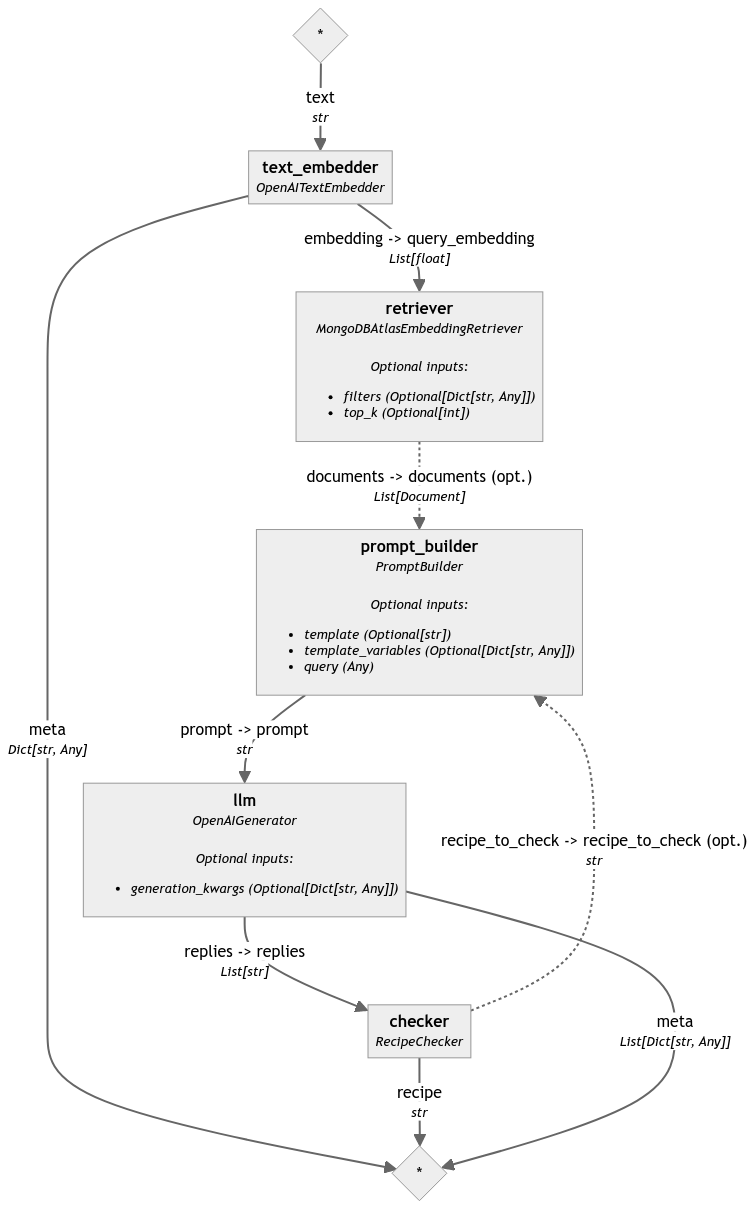

In [ ]:
reflecting_rag_pipeline.show()

As you can see the pipeline will loop through itself to find a more efficient reciepe.

In [15]:
query = "How can I cook a lasagne?"
result = reflecting_rag_pipeline.run(
    {"text_embedder": {"text": query}, "prompt_builder": {"query": query}}
)
print(Fore.GREEN + result["checker"]["recipe"])

Not done yet, could make recipe more efficient
Not done yet, could make recipe more efficient
Not done yet, could make recipe more efficient
It appears that the previously generated recipe was labeled as "B," but without seeing the content of recipe B, I can't tell whether it's the most efficient and cheap way to cook lasagna. Therefore, I will provide a new lasagna recipe that aims to balance cost efficiency and deliciousness.

Let's create a simple yet flavorful lasagna using some of the ingredients you have listed. We'll go for a classic vegetarian lasagna, which tends to be slightly more cost-effective than one containing meat.

### Vegetarian Lasagna Recipe

#### Ingredients
1. Whole Wheat Lasagna Sheets - $3.00
2. Tomato Basil Sauce - $3.50
3. Cottage Cheese - $2.50
4. Spinach - $2.00
5. Zucchini Slices - $2.50
6. Parmesan Cheese - $4.00
7. Garlic Paste - $3.00

#### Steps
1. **Preheat Oven**: Preheat your oven to 375¬∞F (190¬∞C).

2. **Prepare Noodles**: Cook the whole wheat las

## Use JSON format output

Developers will usually prefer dealing with a JSON format output from LLMs when building applications, as well the ease of storing JSON objects in MongoDB Atlas for fututre store and use.

In [26]:
prompt_template = """
    You are a recipe builder assistant. Below you have a list of ingredients followed by its price for each ingredient.
    Respond in JSON format to include only relevant reciepe data, it must have all the markdown under 'markdown_text' field, checker_status : ..., 'ingridiants' : []
    Based on the requested food, provide a step by step recipe, followed by an itemized and total shopping list cost.

    Your recipe should have the following sections:
    - Ingredients
    - Steps
    - Cost

    {% for doc in documents %}
        Ingredient: {{ doc.content }}
        Price: {{ doc.meta['price']}}
    {% endfor %}

    Query: {{query}}
    {% if recipe_to_check %}
        Here is the recipe you previously generated: {{recipe_to_check[0]}}
        Is this the most efficient and cheap way to do this recipe?
        If yes, say 'checker_status' : 'DONE' and return the recipe s in the next line
        If not, say 'incomplete' and return the recipe in the next line
    {% endif %}
    \nRecipe:
"""

reflecting_rag_pipeline = Pipeline(max_loops_allowed=10)
reflecting_rag_pipeline.add_component(
    "text_embedder", OpenAITextEmbedder(model="text-embedding-3-small")
)
reflecting_rag_pipeline.add_component(
    instance=MongoDBAtlasEmbeddingRetriever(document_store=document_store, top_k=50),
    name="retriever",
)
reflecting_rag_pipeline.add_component(
    instance=PromptBuilder(template=prompt_template), name="prompt_builder"
)
reflecting_rag_pipeline.add_component(instance=RecipeChecker(), name="checker")
reflecting_rag_pipeline.add_component(
    instance=OpenAIGenerator(
        model="gpt-4o",
        generation_kwargs={
            "response_format": {"type": "json_object"},
            "temperature": 0,
        },
    ),
    name="llm",
)

reflecting_rag_pipeline.connect("text_embedder.embedding", "retriever.query_embedding")
reflecting_rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
reflecting_rag_pipeline.connect(
    "checker.recipe_to_check", "prompt_builder.recipe_to_check"
)
reflecting_rag_pipeline.connect("prompt_builder", "llm")
reflecting_rag_pipeline.connect("llm", "checker")

üöÖ Components
  - text_embedder: OpenAITextEmbedder
  - retriever: MongoDBAtlasEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - checker: RecipeChecker
  - llm: OpenAIGenerator
üõ§Ô∏è Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)
  - checker.recipe_to_check -> prompt_builder.recipe_to_check (str)
  - llm.replies -> checker.replies (List[str])

In [18]:
!pip install pymongo

In [28]:
import datetime
import json

from pymongo import MongoClient

query = "How can I cook a lasagne?"
result = reflecting_rag_pipeline.run(
    {"text_embedder": {"text": query}, "prompt_builder": {"query": query}}
)
print(Fore.GREEN + result["checker"]["recipe"])

## Load json string output as json
doc = json.loads(result["checker"]["recipe"])

doc["date"] = datetime.datetime.now()

# Insert JSON reciepe into MongoDB
mongo_client = MongoClient(
    os.environ["MONGO_CONNECTION_STRING"],
    appname="devrel.showcase.haystack_cooking_agent",
)
db = mongo_client["ai_shop"]
collection = db["reciepes"]
collection.insert_one(doc)

Not done yet, could make recipe more efficient
{
  "markdown_text": "### Lasagna Recipe\n\n#### Ingredients\n- 1 pack of Whole Wheat Lasagna Sheets ($3.00)\n- 1 jar of Tomato Basil Sauce ($3.50)\n- 1 pack of Tofu Ricotta ($3.00)\n- 1 pack of Spinach ($2.00)\n- 1 pack of Parmesan Cheese ($4.00)\n- 1 pack of Zucchini Slices ($2.50)\n\n#### Steps\n1. **Preheat Oven**: Preheat your oven to 375¬∞F (190¬∞C).\n2. **Prepare Lasagna Sheets**: Cook the whole wheat lasagna sheets according to the package instructions. Drain and set aside.\n3. **Prepare Tofu Ricotta**: In a bowl, mix the tofu ricotta with some salt and pepper to taste.\n4. **Layering**: In a baking dish, spread a thin layer of tomato basil sauce. Place a layer of lasagna sheets on top. Spread a layer of tofu ricotta, followed by a layer of spinach and zucchini slices. Repeat the layers until all ingredients are used, ending with a layer of lasagna sheets.\n5. **Top with Cheese**: Sprinkle the top layer with grated Parmesan cheese.

InsertOneResult(ObjectId('6684f3d4829008e4fb597fbc'), acknowledged=True)